<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is an unsupervised machine learning algorithm. Unsupervised machine learning algorithms are used to classify unlabeled data. In other words, the samples used to train our model do not come with predefined categories. In comparison to other clustering algorithms, DBSCAN is particularly well suited for problems which require:

Minimal domain knowledge to determine the input parameters (i.e. K in k-means and Dmin in hierarchical clustering)
Discovery of clusters with arbitrary shapes
Good efficiency on large databases

Algorithm
As is the case in most machine learning algorithms, the model’s behaviour is dictated by several parameters. In the proceeding article, we’ll touch on three.

eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).
The algorithm works by computing the distance between every point and all other points. We then place the points into one of three categories.

Core point: A point with at least min_samples points whose distance with respect to the point is below the threshold defined by epsilon.

Border point: A point that isn’t in close proximity to at least min_samples points but is close enough to one or more core point. Border points are included in the cluster of the closest core point.

Noise point: Points that aren’t close enough to core points to be considered border points. Noise points are ignored. That is to say, they aren’t part of any cluster.

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

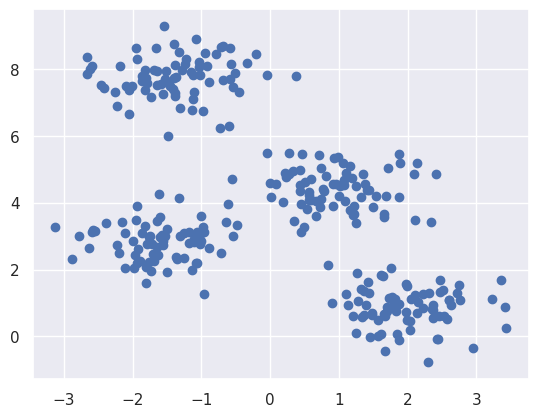

In [4]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [5]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

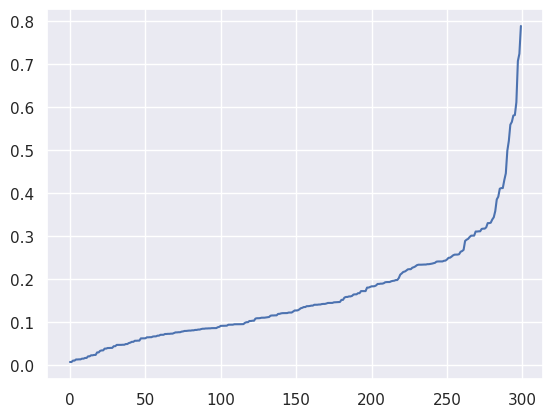

In [6]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [7]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(eps=0.3)

In [8]:
clusters = m.labels_

In [9]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

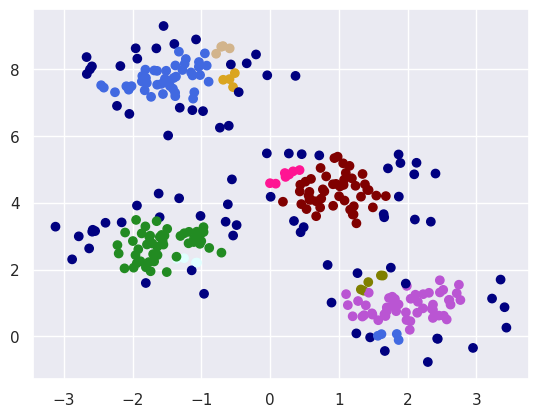

In [10]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))